# Introduction to scientific computing with Python
*Maxime Sangnier*

September, 2021

## Part 3: Linear algebra and scientific computing

# Table of contents
1. [Numpy: numerical arrays in Python](#part1)
    - [What is Numpy](#part1sec1)
    - [Numpy array](#part1sec2)
    - [Operations on arrays](#part1sec3)
1. [Scipy: scientific computing in Python](#part2)
    - [What is Scipy](#part2sec1)
    - [Special functions](#part2sec2)
    - [Linear algebra](#part2sec3)
    - [Optimization](#part2sec4)
    - [Interpolation](#part2sec5)
    - [Numerical integration](#part2sec6)
    - [Others](#part2sec7)
1. [Loading and saving data](#part3)
    - [Basics](#part3sec1)
    - [Text files](#part3sec2)
    - [Images](#part3sec3)
    - [Numpy format](#part3sec4)
    - [Matlab format](#part3sec5)
    - [JSON](#part3sec6)
    - [Pickle](#part3sec7)
1. [Exercises](#part4)
    - [Exercise 1](#part4sec1)
    - [Exercise 2](#part4sec2)
    - [Exercise 3](#part4sec3)
    - [Exercise 4](#part4sec4)
    - [Exercise 5](#part4sec5)
    - [Exercise 6](#part4sec6)
1. [References](#part5)


# Numpy: numerical arrays in Python <a id="part1"></a>
## What is Numpy <a id="part1sec1"></a>
Numpy is a fundamental extension of Python for scientific computing.
This package provides:
- a container, called `ndarray`, for handling numerical arrays;
- [routines](http://docs.scipy.org/doc/numpy/reference/routines.html#routines) for fast operations on arrays (including mathematical and statistical operations);
- universal mathematical functions (cos, log, exp…).

The main asset of Numpy is the `ndarray` object.
Roughly speaking, a Numpy array is a list (or a list of lists of… for n-dimensional arrays) that comes with many methods for scientific computing implemented in fast compiled routines.
Despite the fact that Numpy arrays and lists serve as containers for a collection of items, they diverge on several points:
- an array is a collection of homogeneous objects (same data types);
- an array has a fixed size (definition at creation) while a list can grow dynamically;
- methods for arrays are scientific oriented and efficiently implemented.

The following sections provide a basic introduction to Numpy virtues.

## Numpy array <a id="part1sec2"></a>
### Creation
The main contribution of the numpy package is its multidimensional array.
Since it shares some features with Python lists, an array can be legitimately created from a list.
Let us begin with the following 2-dimensional list:

In [1]:
l = [[18., 17., 16.],
     [14., 19., 18.]]

print(l)

[[18.0, 17.0, 16.0], [14.0, 19.0, 18.0]]


The corresponding array can be created thanks to the `array` function:

In [2]:
import numpy as np

a = np.array(l)
print(a)

[[18. 17. 16.]
 [14. 19. 18.]]


Let us have a look to the more import attributes of the array object:

In [3]:
print("Rank (number of dimensions, also called axes) of a: ", a.ndim)

Rank (number of dimensions, also called axes) of a:  2


In [4]:
print("Dimensions (or shape) of a:", a.shape)  # The result is a tuple

Dimensions (or shape) of a: (2, 3)


In [5]:
print("Total number of items in a:", a.size)

Total number of items in a: 6


In [6]:
print("Types of items:", a.dtype)

Types of items: float64


Note that the type of items is automatically inferred at creation.
In the following example, an array of integers is created.

In [7]:
print(np.array([1, 2, 3]).dtype)

int64


The type can be changed *a posteriori* with `asarray`.

In [8]:
np.asarray(a, dtype='int64')

array([[18, 17, 16],
       [14, 19, 18]])

The type can also be forced at creation:

In [9]:
b = np.array([1, 2, 3], dtype="complex")

print(b)
print(b.dtype)

[1.+0.j 2.+0.j 3.+0.j]
complex128


### Arrays from Numpy routines
Appart from the `array` function, a Numpy array can be created in several other ways (see the documentation for further details on the parameters):

In [10]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [11]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
np.ones((2, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [13]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
np.diag([1., 2, 3])

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [15]:
np.linspace(0, 1, num=6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

**Question**

Consult the help of `arange` and produce the object `array([ 2,  5,  8, 11, 14])`.

In [ ]:
# Answer

### Shape modification
The shape of an array can be modified with many routines.
The main one is `resize`.

In Python, the norm for resizing a vector is *the rightmost index changes first*.
This means that a 2D array `m` is filled in the following order: m[0, 0], m[0, 1], m[0, 2], …, m[1, 0]…
**This is different from R and Matlab**.

In [17]:
m = np.arange(12)
m.resize(4, 3)  # In-place operation
print(m)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


This is equivalent to modifying the `shape` attribute of the array (yet I advise you not to use it):

In [18]:
m.shape = (3, 4)
print(m)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


To go back to a one-dimensional array, one can use the `ravel` method:

In [19]:
m.ravel()  # Not in-place

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Note that this is **not an in-place** method, meaning that it does not alter the original array.
About this, two other methods are similar to `resize` and `ravel`:
- `reshape` creates a new **view** of the object while `resize` runs **in-place**;
- `flatten` creates a **copy** of the object while `ravel` returns a new **view**.
The difference between copy and view is explained below.

In [20]:
print(m.reshape(2, 6))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [21]:
print(m.flatten())

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [22]:
print(m)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Note that with the `reshape` method and the `shape` attribute, one dimension can be automatically calculated by giving `-1`:

In [23]:
m.shape = (2, -1)
print(m)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [24]:
m.reshape(-1, 2)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

**Remark :**
I advise you to use `reshape` and `ravel`, which are two convenient methods returning a new view of the object.

Finally, a new dimension can be added to an array with the object `newaxis`:

In [25]:
c = np.ones(3)
print(c)

[1. 1. 1.]


In [26]:
c = c[:, np.newaxis]
print(c)

[[1.]
 [1.]
 [1.]]


This technique is equivalent to reshaping with dimensions `(-1, 1)`:

In [27]:
np.ones(3).reshape(-1, 1)

array([[1.],
       [1.],
       [1.]])

### Repetition and concatenation
Besides modifying their shapes, arrays can also be repeated and concatenated:

In [28]:
m = np.arange(4).reshape(2, -1)
print(m)

[[0 1]
 [2 3]]


In [29]:
np.tile(m, (2, 3))  # 2 repetitions in line, 3 in column

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])

In [30]:
p = np.linspace(-2, -0.5, num=4).reshape(2, -1)
print(p)

[[-2.  -1.5]
 [-1.  -0.5]]


In [31]:
np.concatenate((m, p))

array([[ 0. ,  1. ],
       [ 2. ,  3. ],
       [-2. , -1.5],
       [-1. , -0.5]])

In [32]:
np.concatenate((m, p), axis=1)

array([[ 0. ,  1. , -2. , -1.5],
       [ 2. ,  3. , -1. , -0.5]])

For 2D-arrays, the last two operations can also be done by stacking arrays vertically or horizontally:

In [33]:
np.vstack((m, p))

array([[ 0. ,  1. ],
       [ 2. ,  3. ],
       [-2. , -1.5],
       [-1. , -0.5]])

In [34]:
np.hstack((m, p))

array([[ 0. ,  1. , -2. , -1.5],
       [ 2. ,  3. , -1. , -0.5]])

Finally, stacking objects of different kinds may also be a way to create arrays.
This is the purpose of the routines `r_` (for *row*) and `c_` (for *column*).
The first one is used for concatenating horizontally 1D-arrays while the second one serves for 2D-arrays.
Beware of the notation. It is quite unusual:

In [35]:
np.r_[0:6:2, -1:1:6j, [0]*3, 5, 6, np.array([1, 3, 5])]

array([ 0. ,  2. ,  4. , -1. , -0.6, -0.2,  0.2,  0.6,  1. ,  0. ,  0. ,
        0. ,  5. ,  6. ,  1. ,  3. ,  5. ])

Here, we used the slice notation of `0:6:2`, which produces the same as `np.arange(0, 6, step=2)`, that is `[0, 2, 4]` (no 6!).
However, when the step is an imaginary number, the slice notation is equivalent to a linspace.
In other words, `-1:1:6j` produces the same as `np.linspace(-1, 1, num=6)`.

In [36]:
np.c_[m, [[0], [0]], p]  # Concatenation of 2D-arrays

array([[ 0. ,  1. ,  0. , -2. , -1.5],
       [ 2. ,  3. ,  0. , -1. , -0.5]])

**Question**

With `reshape` and `concatenate`, produce the array:
    
    [[ 0 -2  0  2]
     [-4 -6  4  6]].

In [ ]:
# Answer

### Indexing and slicing
A one-dimensional array can be indexed, sliced and iterated over the same way as a list:

In [38]:
a = np.arange(4)
print(a)
a[1:3]

[0 1 2 3]


array([1, 2])

In [39]:
a[[0, 2]]

array([0, 2])

In [40]:
for it in np.linspace(0, 1, num=6):
    print(it**2, end=" ")

0.0 0.04000000000000001 0.16000000000000003 0.3600000000000001 0.6400000000000001 1.0 

For a multi-dimensional array (here 2D), a single index is interpreted as accessing the first axis of the array:

In [41]:
m = np.arange(12).reshape(4, 3)
print(m)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


Note that the first axis is understood from **top to bottom**.

In [42]:
print(m[0])

[0 1 2]


In [43]:
for row in m:
    print(row)

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10 11]


To iterate on each element of a multi-dimensional array, one can use the `flat` attribute, which is an iterator over all items:

In [44]:
c = 0
for it in m.flat:
    c += 1 - it%2
print("Number of even items:", c)

Number of even items: 6


Yet, one can access items of a multi-dimensional array with multi-dimensional indexes:

In [45]:
m[0, 1]

1

Note that this is equivalent to:

In [46]:
m[0][1]

1

Some parameters of the slice can be automatically inferred:

In [47]:
m[:2, 1:]  # Until Row 2 (excluded), from Column 1 (included)

array([[1, 2],
       [4, 5]])

In [48]:
m[2:, :]  # ':' means 'all'

array([[ 6,  7,  8],
       [ 9, 10, 11]])

A feature of Numpy is to provide two methods of *fancy indexing* for arrays.
The first one is with lists/arrays:

In [49]:
print(m)
print("Extracted array:", m[[1, 1, 2], [0, 1, 2]])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
Extracted array: [3 4 8]


The second method is using masks:

In [50]:
print(np.logical_and(3 < m, m < 9))

[[False False False]
 [False  True  True]
 [ True  True  True]
 [False False False]]


In [51]:
print(m[np.logical_and(3 < m, m < 9)])

[4 5 6 7 8]


These two methods are particularly useful for assignments:

In [52]:
m[m%2 == 1] -= 1
print(m)

[[ 0  0  2]
 [ 2  4  4]
 [ 6  6  8]
 [ 8 10 10]]


**Question**

Set all the negative items of the following array to 0.

In [53]:
u = ((-1)**np.arange(12) * (np.arange(-6, 6))).reshape(3, -1)
print(u)

[[-6  5 -4  3]
 [-2  1  0 -1]
 [ 2 -3  4 -5]]


In [ ]:
# Answer

### Copies and views
As already stated in the first part of this tutorial, Python objects are rarely copied but often only bound.
This is still true with Numpy arrays (they are mutable objects) and even a bit more complicated.
There are three situations:
#### No copy
With the assignment operator and arrays as parameters of a function, there is no copy:

In [55]:
p = m
p is m

True

In [56]:
def f(x):
    return id(x)

print(id(m), f(m))

140491979755152 140491979755152


#### View
With Numpy, two arrays can share the same data.
The `view` method enables to create a new array that looks at the same data:

In [57]:
p = m.view()
p is m  # Different objects

False

In [58]:
p.base is m.base  # Same data

True

Some attributes of a view can be modified without altering the data.
For instance the shape:

In [59]:
p.shape = (1, -1)
print(p)

[[ 0  0  2  2  4  4  6  6  8  8 10 10]]


In [60]:
print(m)

[[ 0  0  2]
 [ 2  4  4]
 [ 6  6  8]
 [ 8 10 10]]


As an example, slicing and array returns a view of it:

In [61]:
s = m[1, 1:]
print(s)

[4 4]


In [62]:
s.base is m.base

True

In [63]:
s[:] = -1
print(s)

[-1 -1]


In [64]:
print(m)

[[ 0  0  2]
 [ 2 -1 -1]
 [ 6  6  8]
 [ 8 10 10]]


#### Copy
The `copy` method makes a complete copy of an array (object and data):

In [65]:
p = m.copy()
print(p is m, p.base is m.base)

False False


## Operations on arrays <a id="part1sec3"></a>
### Basic operations
In Numpy, operations on arrays are elementwise.
The result is returned in a new array.

In [66]:
a = np.arange(4)
print("a =", a)

b = a * 10  # Product with a scalar
print("b =", b)

a = [0 1 2 3]
b = [ 0 10 20 30]


In [67]:
b-a  # Sum and differences

array([ 0,  9, 18, 27])

In [68]:
a**2  # Power

array([0, 1, 4, 9])

In [69]:
a * b  # Product with another array

array([ 0, 10, 40, 90])

In [70]:
b < 10.5  # Comparison

array([ True,  True, False, False])

Som operations, such as *+=* and **=* are inplace (no copy):

In [71]:
a += 2
print(a)

[2 3 4 5]


### Broadcasting
A major feature of array is operation broadcasting, that is the ability to operate on arrays with different shapes.
Broadcasting is a way of vectorizing array operations with fast backward implementations.

The main rule of broadcasting is that the shapes of two arrays are compatible when:
- they are the same;
- a shape is different but is equal to 1 (in this case, the array is identically repeated along this direction);
- a dimension is missing (in this case, numpy creates a new dimension at the beginning and the array is identically repeated along this new first direction).

A common example of this last case is operation between an array and a reduced version of it along the axis 0 (see below).

In [72]:
x = np.arange(12).reshape(4, -1)
print(x)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


The mean along the first axis is:

In [73]:
m = x.mean(axis=0)
print(m)

[4.5 5.5 6.5]


Then, centering the array can be easily performed in the following way:

In [74]:
c = x - m
print(c)

[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]


In [75]:
print(c.mean(axis=0))

[0. 0. 0.]


**Question**

What is the aim of the operation `u - ur.reshape(-1, 1)`?

In [76]:
u = np.arange(16).reshape(4, -1)
ur = u.mean(axis=1)

In [ ]:
# Answer

### Mathematical methods
As stated in the introduction, a major feature of Numpy is to provide mathematical methods with fast implementations.
For instance:

In [78]:
print(a)
a.sum(), a.prod()

[2 3 4 5]


(14, 120)

In [79]:
a.cumsum()

array([ 2,  5,  9, 14])

In [80]:
a.mean(), a.std()

(3.5, 1.118033988749895)

In [81]:
a.min(), a.max()

(2, 5)

In [82]:
a.argmin(), a.argmax()

(0, 3)

In [83]:
c = np.array([4, 3, 6, 5, 9])
c.sort()  # In-place sorting
print(c)

[3 4 5 6 9]


Note that for multidimensional arrays, the axis of operation can be specified:

In [84]:
m = np.arange(12).reshape(4, -1)
print(m)
print(m.sum(axis=1))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[ 3 12 21 30]


### Universal functions
As a mathematical package, Numpy provides elementary functions (called [*universal functions*](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations)) such as the following ones.
These functions apply element-wise and return an array.

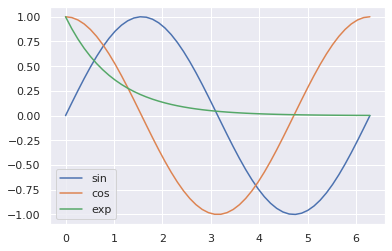

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

t = np.linspace(0, 2*np.pi, num=50)

fig, ax = plt.subplots()
ax.plot(t, np.sin(t), label="sin")
ax.plot(t, np.cos(t), label="cos")
ax.plot(t, np.exp(-t), label="exp")
ax.legend();

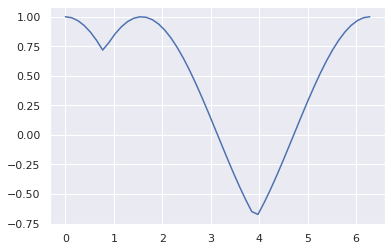

In [86]:
fig, ax = plt.subplots()
ax.plot(t, np.fmax(np.sin(t), np.cos(t)));

**Question**

Compute and plot on the last graphic the curve of $\left| \max(\sin(t), \cos(t)) - 0.25 \right|$.

In [ ]:
# Answer

### Linear algebra
A major application of Numpy is [linear algebra](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html).
For this purpose, Numpy provides a `matrix` object, yet it is hardly ever used in practice.
Scientists generally prefer to handle traditional arrays with routines from linear algebra.
Some examples are provided below.

In [88]:
a = np.ones(5)
print(a)

b = np.arange(5)
print(b)

[1. 1. 1. 1. 1.]
[0 1 2 3 4]


In [89]:
print(a.dot(b))  # Dot product

10.0


In [90]:
A = np.outer(a, b)  # Outer product
print(A)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


In [91]:
B = np.diag([0.2, 0.7, -1, 2, 5])
print(B)

[[ 0.2  0.   0.   0.   0. ]
 [ 0.   0.7  0.   0.   0. ]
 [ 0.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   2.   0. ]
 [ 0.   0.   0.   0.   5. ]]


In [92]:
print(A.dot(B))  # Matrix product (different from A*B!)

[[ 0.   0.7 -2.   6.  20. ]
 [ 0.   0.7 -2.   6.  20. ]
 [ 0.   0.7 -2.   6.  20. ]
 [ 0.   0.7 -2.   6.  20. ]
 [ 0.   0.7 -2.   6.  20. ]]


In [93]:
print(A.T)  # Transposed matrix

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


In [94]:
C = np.random.randn(*A.shape)
C = C.dot(C.T)  # Symmetric positive semidefinite matrix

np.set_printoptions(precision=2)
print(C)

[[ 6.47  2.84 -2.39 -3.81 -0.38]
 [ 2.84  2.41  0.38 -2.09  0.34]
 [-2.39  0.38  3.44  2.08  1.49]
 [-3.81 -2.09  2.08  4.28  0.57]
 [-0.38  0.34  1.49  0.57  6.01]]


In [95]:
print(np.linalg.eigvalsh(C))  # Eigenvalues

[7.16e-03 1.39e+00 2.83e+00 6.46e+00 1.19e+01]


In [96]:
print(np.linalg.eigvalsh(C).sum(), C.trace())  # Trace of C

22.611132537995537 22.611132537995537


In [97]:
invC = np.linalg.inv(C)  # Inverse of C
pC = invC.dot(C)
pC[pC < 1e-10] = 0  # Erase numerical errors before printing

print(pC)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


**Question**

Based on the array defined below, compute the matrix $(2^{-|i-j|})_{1 \le i, j \le 4}$.

In [98]:
ind = np.outer(np.arange(4), np.ones(4))
print(ind)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]


In [ ]:
# Answer

### Others

In [100]:
print(np.any(C < -1, axis=0))  # Test if a column has at least one value less than -1

[ True  True  True  True False]


In [101]:
print(np.all(C > -5, axis=1))  # Test if a row has all values greater than -5

[ True  True  True  True  True]


In [102]:
indx, indy = np.where(C < -1)  # Indices where C is less than -1
# This is equivalent to np.nonzero(C < -1).
print(indx, indy)

[0 0 1 2 3 3] [2 3 3 0 0 1]


In [103]:
print(C[indx, indy])

[-2.39 -3.81 -2.09 -2.39 -3.81 -2.09]


In [104]:
np.floor(C)  # Floor of C

array([[ 6.,  2., -3., -4., -1.],
       [ 2.,  2.,  0., -3.,  0.],
       [-3.,  0.,  3.,  2.,  1.],
       [-4., -3.,  2.,  4.,  0.],
       [-1.,  0.,  1.,  0.,  6.]])

# Scipy: scientific computing in Python <a id="part2"></a>
## What is Scipy <a id="part2sec1"></a>
Scipy is a collection of mudules for various mathematical purposes.
Leveraging the Numpy package, Scipy offers a broad and powerful environment for solving scientific problems.
Roughly speaking, Scipy is to Python what toolboxes are to Matlab.

In the forthcoming sections, a few modules of Scipy are skimmed.

## Special functions <a id="part2sec2"></a>
An important feature of the [scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) module is the definition of numerous mathematical functions, called *special functions*.
Available functions include Airy, elliptic, Bessel, gamma, beta, hypergeometric, parabolic cylinder, Mathieu, spheroidal wave, Struve, and Kelvin.

**Question**

Plot the error function on the line $[-3, 3]$.

In [ ]:
# Answer

## Linear algebra <a id="part2sec3"></a>
The [scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) module is crafted for linear algebra.
It subsumes all the functions in numpy.linalg and adds other more advanced ones.

Here is a non-exhaustive list of scipy.linalg's assets.

### Inverse of a matrix

In [106]:
from scipy import linalg
print(C)

[[ 6.47  2.84 -2.39 -3.81 -0.38]
 [ 2.84  2.41  0.38 -2.09  0.34]
 [-2.39  0.38  3.44  2.08  1.49]
 [-3.81 -2.09  2.08  4.28  0.57]
 [-0.38  0.34  1.49  0.57  6.01]]


In [107]:
pC_sci = linalg.inv(C).dot(C)
pC_sci[pC_sci < 1e-10] = 0  # Erase numerical errors before printing

print(pC)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### Solving a linear system
Here we try to solve the linear system $Cx = b$ for $x$.

In [108]:
b = np.random.randn(C.shape[0])
x = linalg.solve(C, b)
print(x)

[ 32.75 -74.17  51.46 -31.79  -3.63]


In [109]:
print(C.dot(x), b)

[ 0.33 -1.08 -1.11 -1.22 -0.63] [ 0.33 -1.08 -1.11 -1.22 -0.63]


**Remark:**
It is numerically more efficient to compute $C^{-1}b$ with `solve` than `inv`.

In [110]:
from timeit import timeit

setup = """
from scipy.linalg import solve, inv
from numpy.random import randn

n = 200
C = randn(n, n)
C = C.dot(C.T)
b = randn(n)
"""

print('solve: {0:0.2f}s'.format(timeit('x = solve(C, b);', setup=setup, number=100)))
print('inv: {0:0.2f}s'.format(timeit('x = inv(C).dot(b);', setup=setup, number=100)))

solve: 0.31s
inv: 0.30s


### Eigendecomposition
The eigendecomposition is illustrated here, yet many others are available: singular value, LU, Cholesky, QR and Schur decompositions.

In [111]:
print(linalg.eigvalsh(C))

[7.16e-03 1.39e+00 2.83e+00 6.46e+00 1.19e+01]


### Special matrices
An important feature of `scipy.linalg` over `numpy.linalg` is to provide several functions for creating special matrices such as block diagonal, circulant, Hadamard, Toeplitz…

In [112]:
print(linalg.block_diag(A, B))

[[ 0.   1.   2.   3.   4.   0.   0.   0.   0.   0. ]
 [ 0.   1.   2.   3.   4.   0.   0.   0.   0.   0. ]
 [ 0.   1.   2.   3.   4.   0.   0.   0.   0.   0. ]
 [ 0.   1.   2.   3.   4.   0.   0.   0.   0.   0. ]
 [ 0.   1.   2.   3.   4.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.2  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.7  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   2.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   5. ]]


In [113]:
print(linalg.circulant(np.arange(4)))

[[0 3 2 1]
 [1 0 3 2]
 [2 1 0 3]
 [3 2 1 0]]


## Optimization <a id="part2sec4"></a>
The [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) module offers several common but efficient routines for constrained and unconstrained optimization, as well as curve fitting and root finding.
### Local optimization
The main interfaces for optimization offered by scipy.optimize are `minimize` (Nelder-Mead, BFGS, Newton, etc.) for local multivariate optimization, `minimize_scalar` for univariate optimization and `linprog` for linear programming (Simplex algorithm). In addition, other routines are available for global optimization and least-squares.

In [114]:
from scipy import optimize
# import warnings
# warnings.filterwarnings('ignore')

def f(x):
    return x**2 + 10*np.sin(x)

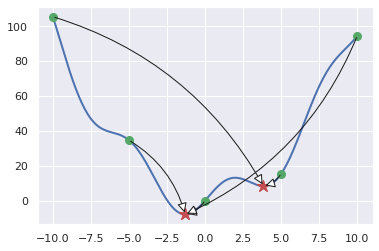

In [115]:
x = np.arange(-10, 10, 0.1)

fig, ax = plt.subplots()
ax.plot(x, f(x), linewidth=2)

for x0 in np.linspace(-10, 10, 5):
    sol = optimize.minimize(f, x0, method='BFGS')
    ax.annotate("", xy=(sol.x[0], f(sol.x[0])), xytext=(x0, f(x0)), size=20,
                arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=-0.2", edgecolor="k", facecolor='w'))
    ax.plot(x0, f(x0), 'go', markersize=8)
    ax.plot(sol.x, f(sol.x), '*r', markersize=12)

### Curve fitting
Given some points $\{x_i, y_i\}_{i=1}^n$ and a model $f(\cdot, \theta)$ parametrized by $\theta$, `scipy.optimize.curve_fit` finds a good parameter $\theta^\star$ that makes it possible for the model $f(\cdot, \theta^\star)$ to explain $y_i$ based on $x_i$.
The solution $\theta^\star$ is obtained by solving non-linear least-squares.

/home/maxime/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


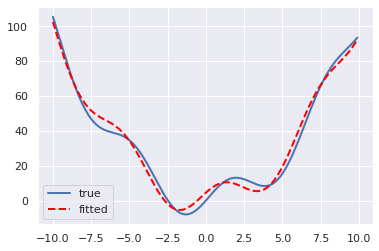

In [116]:
def f_model(x, theta1, theta2, theta3, theta4):
    return theta1*x**2 + theta2*np.sin(x+np.pi/6)

x = np.linspace(-10, 10, num=10)
y = f(x)

popt, pcov = optimize.curve_fit(f_model, x, y)

x_plot = np.arange(-10, 10, 0.1)

fig, ax = plt.subplots()
ax.plot(x_plot, f(x_plot), linewidth=2, label="true")
ax.plot(x_plot, f_model(x_plot, *popt), linestyle='dashed', color="red", linewidth=2, label="fitted")
ax.legend();

### Root finding
Several routines are available for finding roots and fixed points of a function (see [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)).
For instance, one can use `fsolve`:

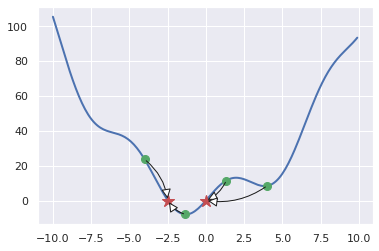

In [117]:
x = np.arange(-10, 10, 0.1)

fig, ax = plt.subplots()
ax.plot(x, f(x), linewidth=2)

for x0 in np.linspace(-4, 4, 4):
    root = optimize.fsolve(f, x0)
    ax.annotate("", xy=(root[0], f(root[0])), xytext=(x0, f(x0)), size=20,
                arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=-0.2", edgecolor="k", facecolor="w"))
    ax.plot(x0, f(x0), 'go', markersize=8)
    ax.plot(root, f(root), '*r', markersize=12)

## Interpolation <a id="part2sec5"></a>
[scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) provides functions for uni and multivariate data interpolation.
Here, we only focus on unidimensional interpolation.

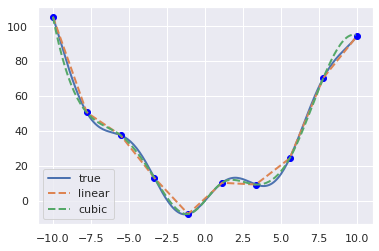

In [118]:
from scipy.interpolate import interp1d


x = np.linspace(-10, 10, num=10)
x_plot = np.arange(-10, 10, 0.1)

fig, ax = plt.subplots()
ax.plot(x_plot, f(x_plot), linewidth=2, label="true")
ax.plot(x, f(x), 'o', markersize=6, color="blue")

for kind in ['linear', 'cubic']:
    f_inter = interp1d(x, f(x), kind=kind)
    ax.plot(x_plot, f_inter(x_plot), label=kind, linewidth=2, linestyle="dashed")
ax.legend();

## Numerical integration <a id="part2sec6"></a>
In the [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) module, one can find several methods (trapezoidal, Simpson, Romberg, etc) for integrating uni, bi and trivariate functions.
Below is an example of univariate integration.

In [119]:
from scipy.special import erf
from scipy.integrate import quad

f = lambda x: np.exp(-x**2)*2/np.sqrt(np.pi)
I, I_err = quad(f, 0, 1)
print(I, erf(1))

0.842700792949715 0.8427007929497148


## Others <a id="part2sec7"></a>
Other possibilities of Scipy include:
- Fourier transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack));
- sparse matrices ([scipy.sparse](docs.scipy.org/doc/scipy/reference/sparse.html));
- signal processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal));
- spatial structures ([scipy.spatial](http://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial));
- multidimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage)).


# Loading and saving data <a id="part3"></a>
The core of Python as well as Numpy and Scipy provide several routines for loading and saving data.
We will review some of them.

## Basics <a id="part3sec1"></a>
With Python only, files are handled thanks to a file object, initialized with `open` and that should be closed after operations completed.
Roughly speaking, operations may be `write`, `read`, `readline` and `readlines`.
Note that only strings can be saved thanks to those routines.

One can open a file with different modes:
- `r`: read only;
- `w`: write only;
- `a`: append;
- `r+`: read and write;
- `[rwa]b`: (read, write, append) binary.

In [120]:
f = open('aux/an_example.txt', 'w')

f.write("""This file is an example.
It illustrates how to write in a file.
As well as how to read a file.""")

f.close()

In [121]:
!cat aux/an_example.txt

This file is an example.
It illustrates how to write in a file.
As well as how to read a file.

It is good practice for handling exceptions and being sure that the file is closed properly to replace the previous script by:

In [122]:
with open('aux/an_example.txt', 'w') as f:
    f.write("""This file is an example.
It illustrates how to write in a file.
As well as how to read a file.""")

print("File closed:", f.closed)

File closed: True


In [123]:
with open('aux/an_example.txt', 'r') as f:
    s = f.read()
    print(s)

This file is an example.
It illustrates how to write in a file.
As well as how to read a file.


The functions `readline` and `readlines` respectively read a single line and put all lines in a list.

In [124]:
with open('aux/an_example.txt', 'r') as f:
    print("First line:", f.readline())
    print("Second line:", f.readline())

First line: This file is an example.

Second line: It illustrates how to write in a file.



In [125]:
with open('aux/an_example.txt', 'r') as f:
    s = f.readlines()
    print(s)

['This file is an example.\n', 'It illustrates how to write in a file.\n', 'As well as how to read a file.']


One may also iterate over the lines of a file.

In [126]:
with open('aux/an_example.txt', 'r') as f:
    for it, line in enumerate(f):
        print("Line", it, ":", line)

Line 0 : This file is an example.

Line 1 : It illustrates how to write in a file.

Line 2 : As well as how to read a file.


## Text files <a id="part3sec2"></a>
Numpy provides two routines for handling arrays saved in text files: `loadtxt` and `savetxt`.

In [127]:
!cat data/consumption.csv

England;Wales;Scotland;N Ireland
105;103;103;66
245;227;242;267
685;803;750;586
147;160;122;93
193;235;184;209
156;175;147;139
720;874;566;1033
253;265;171;143
488;570;418;355
198;203;220;187
360;365;337;334
1102;1137;957;674
1472;1582;1462;1494
57;73;53;47
1374;1256;1572;1506
375;475;458;135
54;64;62;41


In [128]:
data = np.loadtxt("data/consumption.csv", delimiter=";", skiprows=1)
print(data)

[[ 105.  103.  103.   66.]
 [ 245.  227.  242.  267.]
 [ 685.  803.  750.  586.]
 [ 147.  160.  122.   93.]
 [ 193.  235.  184.  209.]
 [ 156.  175.  147.  139.]
 [ 720.  874.  566. 1033.]
 [ 253.  265.  171.  143.]
 [ 488.  570.  418.  355.]
 [ 198.  203.  220.  187.]
 [ 360.  365.  337.  334.]
 [1102. 1137.  957.  674.]
 [1472. 1582. 1462. 1494.]
 [  57.   73.   53.   47.]
 [1374. 1256. 1572. 1506.]
 [ 375.  475.  458.  135.]
 [  54.   64.   62.   41.]]


In [129]:
# Standardization
data -= data.mean(axis=0)
data /= data.std(axis=0)

# Save the data
np.savetxt("data/consumption_std.csv", data)

In [130]:
data_txt = np.loadtxt("data/consumption_std.csv")
print(data_txt)

[[-0.83 -0.89 -0.78 -0.78]
 [-0.51 -0.62 -0.48 -0.35]
 [ 0.49  0.66  0.64  0.34]
 [-0.73 -0.76 -0.74 -0.72]
 [-0.63 -0.6  -0.61 -0.47]
 [-0.71 -0.73 -0.69 -0.62]
 [ 0.57  0.82  0.23  1.3 ]
 [-0.49 -0.53 -0.63 -0.62]
 [ 0.04  0.15 -0.09 -0.16]
 [-0.62 -0.67 -0.53 -0.52]
 [-0.25 -0.31 -0.27 -0.21]
 [ 1.44  1.41  1.09  0.52]
 [ 2.28  2.4   2.2   2.29]
 [-0.94 -0.96 -0.89 -0.82]
 [ 2.06  1.67  2.44  2.31]
 [-0.22 -0.06 -0.   -0.63]
 [-0.95 -0.98 -0.87 -0.84]]


## Images <a id="part3sec3"></a>
Images can be read and saved thanks to the functions *imread* and *imsave* from matplotlib.pyplot.

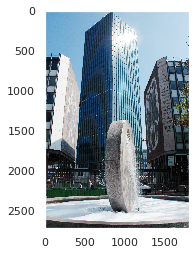

In [131]:
import matplotlib.pyplot as plt

img = plt.imread("img/upmc.jpg")

fig, ax = plt.subplots()
ax.imshow(img);
ax.grid(False)

In [132]:
plt.imsave("img/upmc3.jpg", img[:, :, 0], cmap=plt.cm.gray)  # Save only one channel

Saved image:

<img src="img/upmc3.jpg" width=200>

## Numpy format <a id="part3sec4"></a>
Numpy has its own binary format.
Note that it does not promote interoperability.

In [133]:
np.save('data/consumption.npy', data)

In [134]:
data_npy = np.load('data/consumption.npy')
print(data_npy)

[[-0.83 -0.89 -0.78 -0.78]
 [-0.51 -0.62 -0.48 -0.35]
 [ 0.49  0.66  0.64  0.34]
 [-0.73 -0.76 -0.74 -0.72]
 [-0.63 -0.6  -0.61 -0.47]
 [-0.71 -0.73 -0.69 -0.62]
 [ 0.57  0.82  0.23  1.3 ]
 [-0.49 -0.53 -0.63 -0.62]
 [ 0.04  0.15 -0.09 -0.16]
 [-0.62 -0.67 -0.53 -0.52]
 [-0.25 -0.31 -0.27 -0.21]
 [ 1.44  1.41  1.09  0.52]
 [ 2.28  2.4   2.2   2.29]
 [-0.94 -0.96 -0.89 -0.82]
 [ 2.06  1.67  2.44  2.31]
 [-0.22 -0.06 -0.   -0.63]
 [-0.95 -0.98 -0.87 -0.84]]


## Matlab format <a id="part3sec5"></a>
Scipy offers the possibility to save and read Matlab files with the functions *loadmat*, *whosmat* and *savemat*.

In [135]:
import scipy.io as sio

sio.savemat('data/consumption.mat', {'data': data})

In [136]:
sio.whosmat('data/consumption.mat')

[('data', (17, 4), 'double')]

In [137]:
data_mat = sio.loadmat('data/consumption.mat')['data']
print(data_mat)

[[-0.83 -0.89 -0.78 -0.78]
 [-0.51 -0.62 -0.48 -0.35]
 [ 0.49  0.66  0.64  0.34]
 [-0.73 -0.76 -0.74 -0.72]
 [-0.63 -0.6  -0.61 -0.47]
 [-0.71 -0.73 -0.69 -0.62]
 [ 0.57  0.82  0.23  1.3 ]
 [-0.49 -0.53 -0.63 -0.62]
 [ 0.04  0.15 -0.09 -0.16]
 [-0.62 -0.67 -0.53 -0.52]
 [-0.25 -0.31 -0.27 -0.21]
 [ 1.44  1.41  1.09  0.52]
 [ 2.28  2.4   2.2   2.29]
 [-0.94 -0.96 -0.89 -0.82]
 [ 2.06  1.67  2.44  2.31]
 [-0.22 -0.06 -0.   -0.63]
 [-0.95 -0.98 -0.87 -0.84]]


## JSON <a id="part3sec6"></a>
JSON (which stands for *JavaScript Object Notation*) is a format
with which one can save complex data types such as dictionaries and nested lists by serialization.
It is a secure data format that benefits from inter-operability (data exchange).

However, Numpy arrays cannot be serialized with JSON.

In [138]:
import json

with open('data/consumption.json', 'w') as f:
    json.dump(data.tolist(), f)

In [139]:
with open('data/consumption.json', 'r') as f:
    data_json = np.array(json.load(f))
print(data_json)

[[-0.83 -0.89 -0.78 -0.78]
 [-0.51 -0.62 -0.48 -0.35]
 [ 0.49  0.66  0.64  0.34]
 [-0.73 -0.76 -0.74 -0.72]
 [-0.63 -0.6  -0.61 -0.47]
 [-0.71 -0.73 -0.69 -0.62]
 [ 0.57  0.82  0.23  1.3 ]
 [-0.49 -0.53 -0.63 -0.62]
 [ 0.04  0.15 -0.09 -0.16]
 [-0.62 -0.67 -0.53 -0.52]
 [-0.25 -0.31 -0.27 -0.21]
 [ 1.44  1.41  1.09  0.52]
 [ 2.28  2.4   2.2   2.29]
 [-0.94 -0.96 -0.89 -0.82]
 [ 2.06  1.67  2.44  2.31]
 [-0.22 -0.06 -0.   -0.63]
 [-0.95 -0.98 -0.87 -0.84]]


## Pickle <a id="part3sec7"></a>
Akin to JSON, Pickle (and its C version cPickle for Python 2) is a module aimed at serializing (or pickling) and de-serializing (or unpickling) a Python object structure.
However, Pickle is far more powerful than JSON: it can serialize arbitrarily complex Python objects.
Thus, in practice, any Python object can be saved (and then re-loaded) with Pickle.

However (this is the other side of the coin), **the Pickle module is not secure against erroneous or maliciously constructed data: deserializing pickle data can execute arbitrary harmful code.
Never unpickle data received from an untrusted or unauthenticated source**.

In [140]:
import pickle as pkl  # import cPickle in Python 2, it is faster than pickle

with open('data/consumption.pkl', 'wb') as f:
    pkl.dump(data, f)

In [141]:
with open('data/consumption.pkl', 'rb') as f:
    data_pkl = pkl.load(f)
print(data_pkl)

[[-0.83 -0.89 -0.78 -0.78]
 [-0.51 -0.62 -0.48 -0.35]
 [ 0.49  0.66  0.64  0.34]
 [-0.73 -0.76 -0.74 -0.72]
 [-0.63 -0.6  -0.61 -0.47]
 [-0.71 -0.73 -0.69 -0.62]
 [ 0.57  0.82  0.23  1.3 ]
 [-0.49 -0.53 -0.63 -0.62]
 [ 0.04  0.15 -0.09 -0.16]
 [-0.62 -0.67 -0.53 -0.52]
 [-0.25 -0.31 -0.27 -0.21]
 [ 1.44  1.41  1.09  0.52]
 [ 2.28  2.4   2.2   2.29]
 [-0.94 -0.96 -0.89 -0.82]
 [ 2.06  1.67  2.44  2.31]
 [-0.22 -0.06 -0.   -0.63]
 [-0.95 -0.98 -0.87 -0.84]]


# Exercises <a id="part4"></a>
## Exercise 1 <a id="part4sec1"></a>
Produce the following array:

    [[ 0  4  8 12 16]
     [ 1  5  9 13 17]
     [ 2  6 10 14 18]
     [ 3  7 11 15 19]]

Standardize this array, namely do such that the mean of each column is $0$ and the standard deviation is $1$.

In [ ]:
# Answer

## Exercise 2 <a id="part4sec2"></a>
Plot the [probability density functions](https://en.wikipedia.org/wiki/Chi-squared_distribution) of $\chi^2$ with parameters $k \in \{1, 2, \dots, 5\}$.


In [ ]:
# Answer

## Exercise 3 <a id="part4sec3"></a>
Let $A$ be a matrix and $b$ be a vector defined by:

    V = np.random.randn(5, 5)
    A = V + V.T
    b = np.random.rand(5)

Solve the linear system $Ax = b$ with two different methods.


In [ ]:
# Answer

## Exercise 4 <a id="part4sec4"></a>
Build a symmetric positive semidefinite matrix $H$ of size 5 x 5, a vector $b$ of size 5 and a scalar value $c$.
Compute a minimizer of $x \mapsto \frac 12 x^\top H x + b^\top x + c$.
Compute the minimum of this function.


In [ ]:
# Answer

## Exercise 5 <a id="part4sec5"></a>
Build a symmetric positive semidefinite matrix $X$ of size 5 x 5.
Implement [power iteration](https://en.wikipedia.org/wiki/Power_iteration).
Compute the [Rayleigh quotient](https://en.wikipedia.org/wiki/Rayleigh_quotient) of the resulting vector regarding the matrix $X$.
Rediscover the result with a single Numpy routine.


In [ ]:
# Answer

## Exercise 6 <a id="part4sec6"></a>
Dowload [this data file](http://www.lpsm.paris/pageperso/sangnier/files/pythonM2/Gaussian_sample.mat).
The sample in this file is assumed to be Gaussian iid.
Compute the negative log-likelihood function associated to this sample.
Minimize it with a Scipy routine to estimate $\mu$ and $\sigma$.

In [ ]:
# Answer

# References <a id="part5"></a>
- [Official documentation](https://docs.python.org/3/tutorial/index.html).
- [Numpy and Scipy documentation](http://docs.scipy.org/doc/).
- [Scipy lecture notes](http://www.scipy-lectures.org/index.html).